In [6]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import griddata
import matplotlib.colors as colors

In [3]:
##Data Aquisition
me = np.load('LO_3_0.01/NJ_LO_3_0.01_500000.npy', allow_pickle=True) #Matrix elements - test
momentum = np.load('LO_3_0.01/PS3_0.01_500000.npy', allow_pickle=True, encoding='bytes')#4-momenta of inputs - test

Text(0,0.5,'Frequency Histogram')

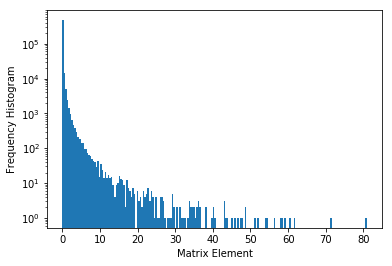

In [5]:
plt.hist(me, bins = 200)
plt.yscale('log')

plt.xlabel('Matrix Element')
plt.ylabel('Frequency Histogram')

In [6]:
print(np.argmax(me))

126968


In [8]:
print(me[np.argmin(me)])
print(momentum[np.argmin(me)])

0.0017198756272075475
[array([500.,   0.,   0., 500.]), array([ 500.,    0.,    0., -500.]), array([ 490.86438821,   75.5887405 ,  290.07026835, -388.70738267]), array([ 343.97458723,   -5.6264378 , -170.62094596,  298.62242491]), array([ 165.16102456,  -69.9623027 , -119.44932239,   90.08495776])]


In [2]:
def data_preprocessing_csv(me_filename, mom_filename, frac=1):
    ##Data Aquisition
    me_raw = np.loadtxt(me_filename)[:,0] #Matrix elements
    mom_raw = np.loadtxt(mom_filename) #4-momenta of inputs
    print(me_raw[:5])
    print(mom_raw[:5])
    
    me=me_raw[:int(frac*len(me_raw))]
    mom=mom_raw[:int(frac*len(mom_raw))]
    
    return(me, mom)

In [3]:
me, mom = data_preprocessing_csv('NLO_2_MG/me_2Jet_1000000.csv','NLO_2_MG/mom_2Jet_1000000.csv')

[-0.00135129 -0.0032708  -0.0009367  -0.00093393 -0.003188  ]
[[ 500.          450.47380762  -14.75157131  216.46186683  500.
  -450.47380762   14.75157131 -216.46186683]
 [ 500.         -497.87686059   -3.11197485  -45.92327625  500.
   497.87686059    3.11197485   45.92327625]
 [ 500.          196.51254857 -161.89204477  430.31823584  500.
  -196.51254857  161.89204477 -430.31823584]
 [ 500.           35.4078168   304.32992654  395.13236051  500.
   -35.4078168  -304.32992654 -395.13236051]
 [ 500.         -476.55806917  146.50589292  -37.79457693  500.
   476.55806917 -146.50589292   37.79457693]]


In [4]:
x1 = mom[:, 1]
x2 = mom[:, 2]

x1i = np.linspace(0, 1, 500) #x1 coordinates
x2i = np.linspace(0, 1, 500) #x2 coordinates
X1i, X2i = np.meshgrid(x1i, x2i) #2d regularly spaced grid of coordinates.

In [8]:
#Value at grid coordinate is mapped to the nearest actual datapoint.
grid = griddata((x1, x2), me, (X1i, X2i), method='linear') 

Text(0.5,0,'Py')

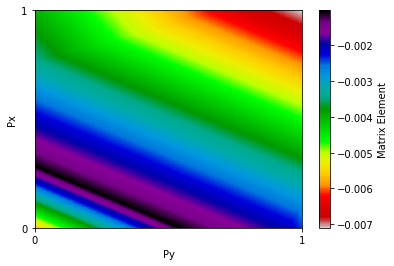

In [11]:
fig, ax = plt.subplots()
im = ax.pcolor(grid, cmap = 'nipy_spectral_r') #color map of coord grid
cbar = ax.figure.colorbar(im)
cbar.set_label('Matrix Element')

ax.set_xticks([0, 500])
ax.set_xticklabels([0, 1])
ax.set_yticks([0, 500])
ax.set_yticklabels([0, 1])


ax.set_ylabel('Px')
ax.set_xlabel('Py')